# Desafio 1

Para esse desafio, vamos trabalhar com o data set [Black Friday](https://www.kaggle.com/mehdidag/black-friday), que reúne dados sobre transações de compras em uma loja de varejo.

Vamos utilizá-lo para praticar a exploração de data sets utilizando pandas. Você pode fazer toda análise neste mesmo notebook, mas as resposta devem estar nos locais indicados.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Set up_ da análise

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
black_friday = pd.read_csv("black_friday.csv")

## Inicie sua análise a partir daqui

### - Plot functions

In [18]:
def trim_axs(axs, N):
    '''   This function takes the an axes list, the number of plots and sets  the axes list with correct length
    
    ARG: 
    axs(array like): array with axes 
    N(integer): number of graphs to be plotted 
    
    RETURS:
    axs(array like): array with correct number of axes to be plotted
    '''

    axs = axs.flatten()
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]


In [19]:

def individual_bar_plots(df, col, title, ax = None):
    '''
    Bar plot for each column
    
    
    ARG:
    df(daraframe): dataframe to be parsed 
    col(string): name of the column
        
    
    '''

    obj = df.loc[col,:]  # Select item

    obj.plot( kind = 'barh',
            color = color,
            edgecolor = 'black', 
            ax = ax,   
            legend = None,              
            ).set_title(f'{title} {col}')
    
    ax.set_xlabel('Purchase Mean [$]')

---

In [20]:
df = black_friday.copy()
print('df shape:', df.shape)
print()
df.head(5)

df shape: (537577, 12)



,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [21]:
# Number of rows
num_rows = df.shape[0]

#dictionary with basic information
aux_dic = {'Type': df.dtypes,
          'MissingValues_percent': df.isna().sum()/ num_rows}
# Dataframe
aux = pd.DataFrame(aux_dic)
aux

,Type,MissingValues_percent
User_ID,int64,0.000000
Product_ID,object,0.000000
Gender,object,0.000000
Age,object,0.000000
Occupation,int64,0.000000
City_Category,object,0.000000
Stay_In_Current_City_Years,object,0.000000
Marital_Status,int64,0.000000
Product_Category_1,int64,0.000000
Product_Category_2,float64,0.310627


## Purchase Mean by Age Group and City

In [22]:
# Filter the purchase mean of each age group by City
age_group_city = df.loc[:,['Age', 'City_Category', 'Purchase']]
age_group_city = age_group_city.pivot_table(age_group_city, index = ['Age', 'City_Category'], aggfunc = 'mean')
age_group_city.head()

Purchase
Age   City_Category             
0-17  A              8673.295555
      B              8985.208396
      C              9171.916354
18-25 A              8886.956078
      B              9069.532164

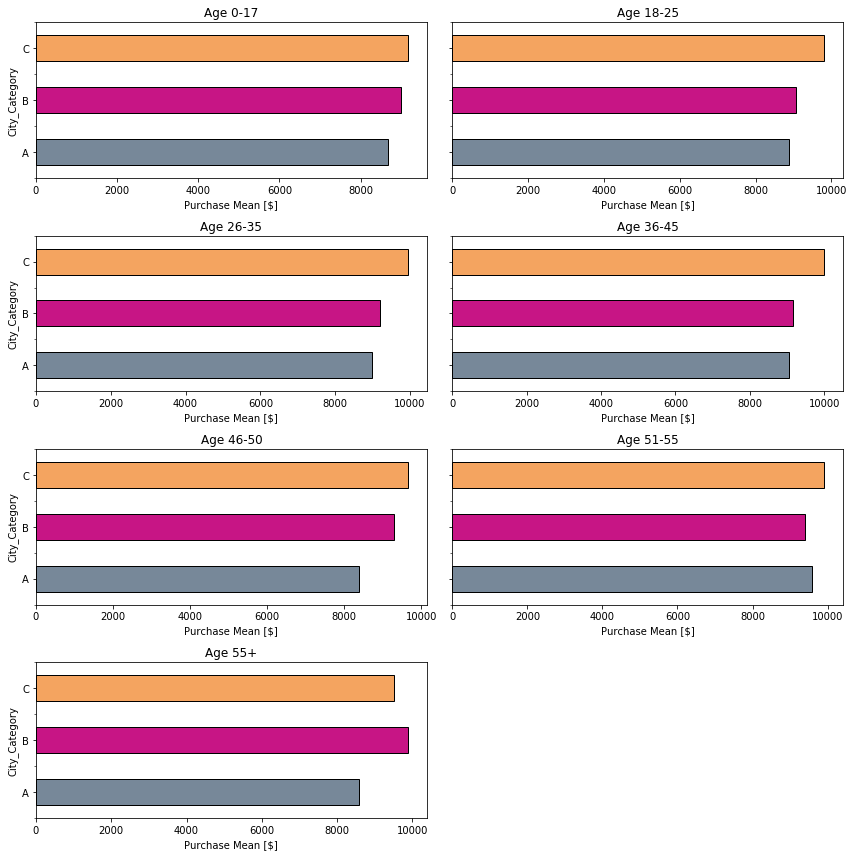

In [23]:
# Set color for bar plots
color = ('lightslategray','mediumvioletred','sandybrown')

# Setup for the 4x2 subplot grid
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 12), sharey=True)

# Correct the lenght of the ax
ax = trim_axs(ax, len(df.Age.unique()))

# Age Groups list
age_list = ['0-17','18-25','26-35','36-45', '46-50','51-55','55+']

# ax.flatten() collapses the ax into one dimension array
for subplot, Age in zip(ax.flatten(), age_list):
    individual_bar_plots(age_group_city, Age, ax=subplot, title = 'Age')
    
plt.tight_layout()

# Purchase of Each Product bu City 

Number of purchases of each product category by city

Text(0.5, 1.0, 'Purchases of Each Product Category by City')

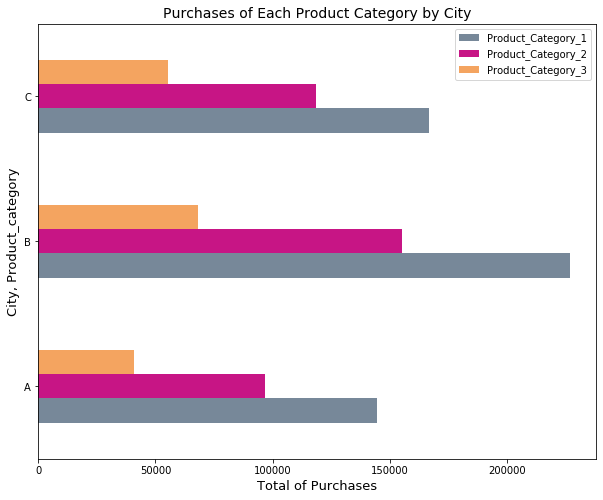

In [24]:
# Filter Dataframe
Purchase_by_City_df = df.loc[:,[ 'City_Category','Product_Category_1', 'Product_Category_2','Product_Category_3']] 

# Pivot Table
Purchase_by_City_Pivt = Purchase_by_City_df.pivot_table(Purchase_by_City_df, index = ['City_Category'], aggfunc = 'count')

#Barplot
Purchase_by_City_Pivt.plot( kind = 'barh',figsize =(10,8), color = color)
plt.xlabel('Total of Purchases', fontsize = 13)
plt.ylabel('City, Product_category', fontsize = 13)
plt.title('Purchases of Each Product Category by City', fontsize = 14 )

# Purchase Mean of Product_Category 1 by City

In [25]:
# Access rows and columns by city
df_city_A = df.loc[df.City_Category == 'A', :]
df_city_B = df.loc[df.City_Category == 'B', :]
df_city_C = df.loc[df.City_Category == 'C', :]
print('=========== City A ==========')
df_city_A.head(3)


=========== City A ==========


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [26]:
print('=========== City B ==========')
df_city_B.head(3)


=========== City B ==========


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686


In [27]:
print('===========City C ===========')
df_city_C.head(3)

===========City C ===========


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
19,1000008,P00249542,M,26-35,12,C,4+,1,1,5.0,15.0,19614
20,1000008,P00220442,M,26-35,12,C,4+,1,5,14.0,NaN,8584


In [28]:
# Groupby purchase means of product_category_1 in cities A,B and C
City_A_Category_1 = df_city_A.groupby('Product_Category_1').mean()['Purchase']
City_B_Category_1 = df_city_B.groupby('Product_Category_1').mean()['Purchase']
City_C_Category_1 = df_city_C.groupby('Product_Category_1').mean()['Purchase']

In [29]:
# Concatenate all series
prod1_df = pd.concat([City_A_Category_1,City_B_Category_1, City_C_Category_1], axis = 1)
# Set columns name
prod1_df.columns = ['City_A', 'City_B', 'City_C']
prod1_df

,City_A,City_B,City_C
Product_Category_1,,,
1,13052.958064,13435.245520,14234.438760
2,10908.784285,11138.330154,11715.659749
3,10028.285981,9999.386245,10272.489805
4,2267.251669,2300.047175,2426.236257
5,6116.099708,6166.109100,6456.465122
6,15515.002399,15754.991317,16224.043080
7,16220.233884,16364.494304,16602.306378
8,7327.948466,7452.683661,7719.059388
9,14831.357798,15681.720930,15964.211382


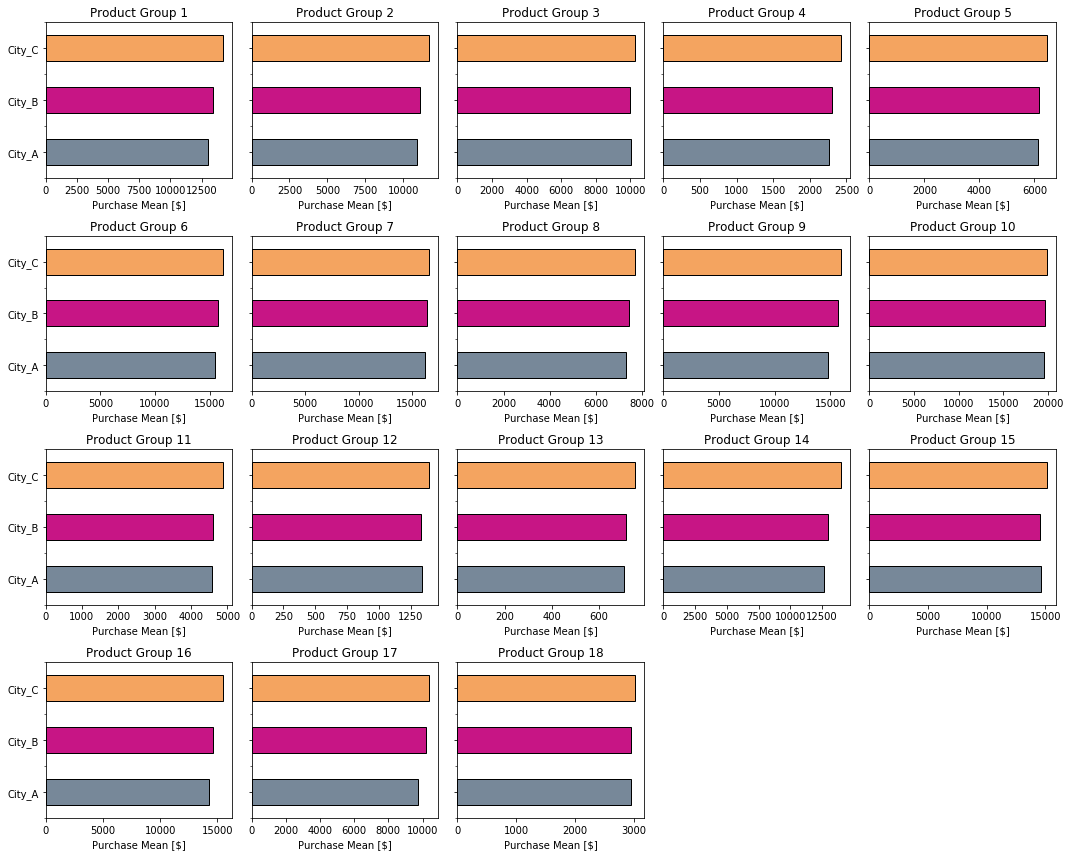

In [30]:
#setup 4 x 5 subplot grid
fig, ax = plt.subplots(nrows = 4 , ncols= 5, figsize = (15,12), sharey = True)

#correct the lenght of the ax
ax = trim_axs(ax, len(df.Product_Category_1.unique()))

color = ['lightslategray','mediumvioletred','sandybrown']

product_category_1_list = sorted(list(df.Product_Category_1.unique()))

for subplot, product in zip(ax.flatten(),product_category_1_list ):
    individual_bar_plots(prod1_df,product,ax = subplot, title = 'Product Group')
    
plt.tight_layout()

## Purchase Mean of Product_Category 2 by City

In [31]:
# Select Series with Purchase Means
City_A_Category_2 = df_city_A.groupby('Product_Category_2').mean()['Purchase']
City_B_Category_2 = df_city_B.groupby('Product_Category_2').mean()['Purchase']
City_C_Category_2 = df_city_C.groupby('Product_Category_2').mean()['Purchase']

In [32]:
# Product 2 DataFrame
prod2_df = pd.concat([City_A_Category_2,City_B_Category_2,City_C_Category_2], axis = 1)
# Naming Columns
prod2_df.columns =['City_A', 'City_B', 'City_C']

In [33]:
prod2_df

,City_A,City_B,City_C
Product_Category_2,,,
2.0,13066.909869,13445.086055,14219.622383
3.0,11065.883788,11120.645329,11473.867617
4.0,10075.208914,10107.659387,10480.724405
5.0,8667.213905,8762.614435,9727.357871
6.0,11242.228294,11235.674769,12073.763277
7.0,6841.752809,6757.891892,7086.365169
8.0,9806.445616,10182.544542,10814.312008
9.0,7233.056435,7222.248766,7410.809496
10.0,15255.033943,15639.910924,15971.294686


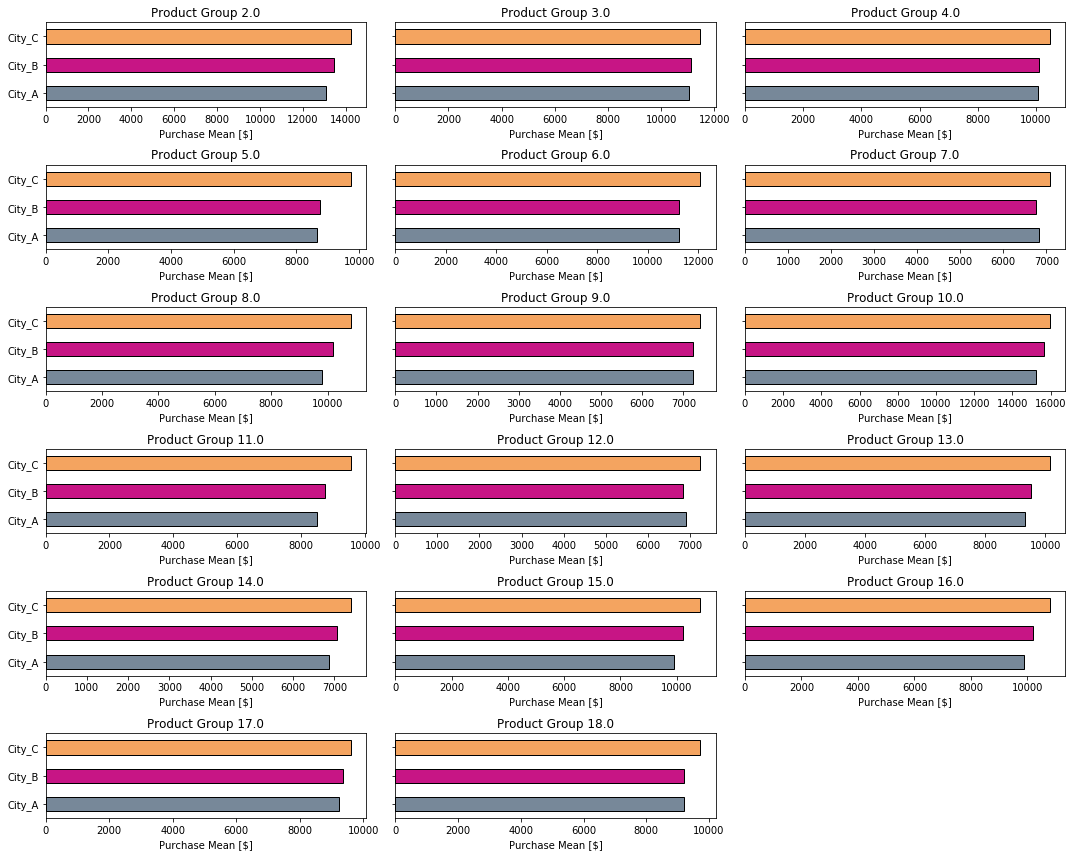

In [34]:
# Setup for the 6 X 3 subplot grid
fig, ax = plt.subplots(nrows=6 , ncols=3, sharey = True, figsize = (15,12))

#Correct the lenght of the ax
ax = trim_axs(ax, len(df.Product_Category_2.unique()[1:]) )

product_category_2_list = sorted(list(df.Product_Category_2.unique()[1:]))

for subplot, product in zip(ax.flatten(), product_category_2_list):
    individual_bar_plots(prod2_df,product,ax = subplot, title = 'Product Group')

plt.tight_layout()

## Purchase Mean of Product_Category 3 by City

In [35]:
# Select Series with Purchase Means
City_A_Category_3 = df_city_A.groupby('Product_Category_3').mean()['Purchase']
City_B_Category_3 = df_city_B.groupby('Product_Category_3').mean()['Purchase']
City_C_Category_3 = df_city_C.groupby('Product_Category_3').mean()['Purchase']

In [36]:
# Product 3 DataFrame
prod3_df = pd.concat([City_A_Category_3,City_B_Category_3,City_C_Category_3] , axis =1 )
# Naming Columns
prod3_df.columns = ['City_A', 'City_B', 'City_C']
prod3_df

,City_A,City_B,City_C
Product_Category_3,,,
3.0,13969.673333,14008.585551,13874.818182
4.0,9434.113978,9574.196429,10319.834179
5.0,11887.027325,12057.797247,12379.605992
6.0,12569.577262,13038.285996,13891.935107
8.0,12663.153364,12883.700040,13458.201950
9.0,9947.309515,10314.337148,10882.095887
10.0,13847.980861,13331.246696,13514.181970
11.0,11472.178971,12059.382470,12682.212914
12.0,8574.229700,8637.861063,8954.959022


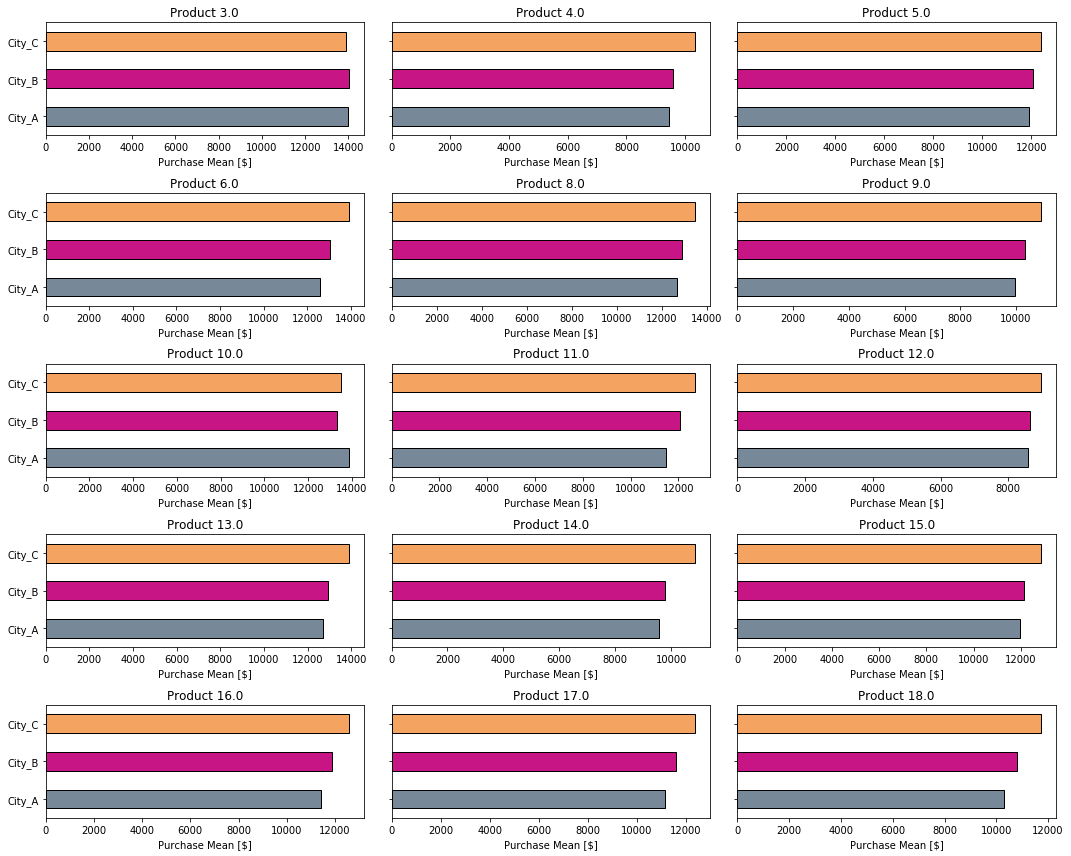

In [37]:
#Setup for 5 x 3 subplot grid
fig, ax  = plt.subplots( nrows= 5, ncols=3, sharey = True, figsize = (15,12))

product_category_3_list = sorted(list(df.Product_Category_3.unique()[1:]))

for subplot, product in zip(ax.flatten(), product_category_3_list):
    individual_bar_plots(prod3_df,product, ax = subplot, title = 'Product')

plt.tight_layout()

## Gender Analysis:

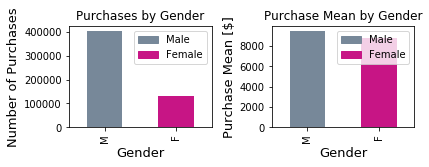

In [38]:
# Plotting Purchase by Gender
plt.subplot(221)

# Number of Males and Females
df.Gender.value_counts().plot(kind= 'bar', title = 'Purchases by Gender', color = color)

plt.xlabel('Gender', fontsize = 13)
plt.ylabel('Number of Purchases', fontsize = 13)
import matplotlib.patches as mpatches
gray_patch = mpatches.Patch(color ='lightslategray', label = 'Male')
violet_patch = mpatches.Patch(color = 'mediumvioletred', label = 'Female')
plt.legend(handles = [gray_patch,violet_patch], loc = 'best')


#Plotting Purchase Mean by Gender
plt.subplot(222)

df.groupby('Gender').mean()['Purchase'] .sort_values(ascending = False).plot(kind = 'bar',
                                                                         color = color,
                                                                         title = 'Purchase Mean by Gender')
                                                                    
plt.ylabel('Purchase Mean [$]', fontsize = 13)
plt.xlabel('Gender', fontsize = 13)
plt.legend(handles = [gray_patch,violet_patch], loc = 'best')
plt.tight_layout()




plt.rcParams['figure.figsize'] =(12,8)

## Purchases Mean by Gender and Age Group

In [39]:
# Purchase mean by age and gender
gender_age_pvt = df.pivot_table(df , index = ['Age', 'Gender'], aggfunc = 'mean')['Purchase']
gender_age_pvt

Age    Gender
0-17   F         8444.703210
       M         9312.322227
18-25  F         8405.430852
       M         9506.501081
26-35  F         8791.798654
       M         9470.621052
36-45  F         9046.573808
       M         9517.126321
46-50  F         8929.448740
       M         9429.151563
51-55  F         9131.451837
       M         9789.020476
55+    F         9119.577196
       M         9557.058094
Name: Purchase, dtype: float64

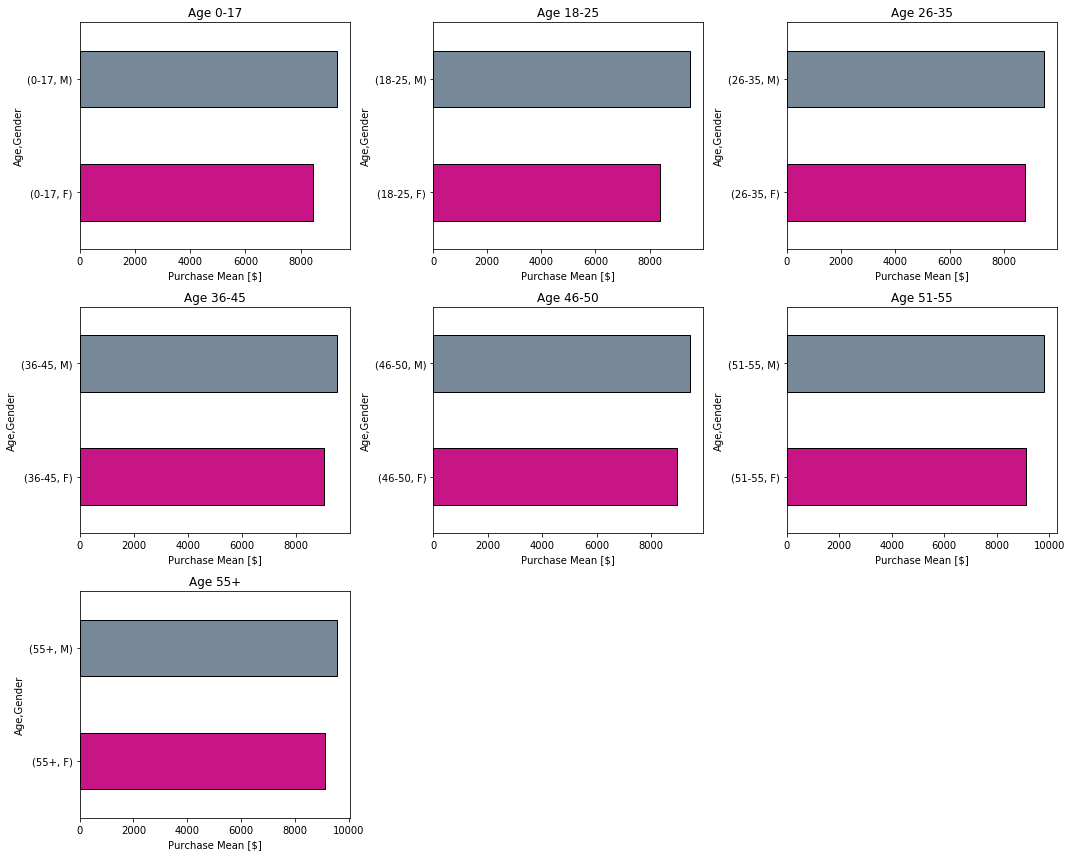

In [40]:

fig, ax = plt.subplots(nrows = 3 , ncols= 3, figsize = (15,12), sharey = False)

#correct the lenght of the ax
ax = trim_axs(ax, len(df.Age.unique()))

# set colors
color = ['mediumvioletred','lightslategray']

for subplot, Age in zip(ax.flatten(),age_list ):
    individual_bar_plots(gender_age_pvt,Age,ax = subplot, title = 'Age')
    
plt.tight_layout()

## Purchase Mean by Gender and City

In [41]:

# Select Dataframe
purchase_mean_by_gender_city = df.loc[:,['Gender', 'City_Category','Purchase']]
# Pivot Table with Purchase Mean
pvt_purchase_mean_by_gender_city = purchase_mean_by_gender_city.pivot_table(purchase_mean_by_gender_city, 
                                                                           index = ['Gender','City_Category'],
                                                                           aggfunc = 'mean')

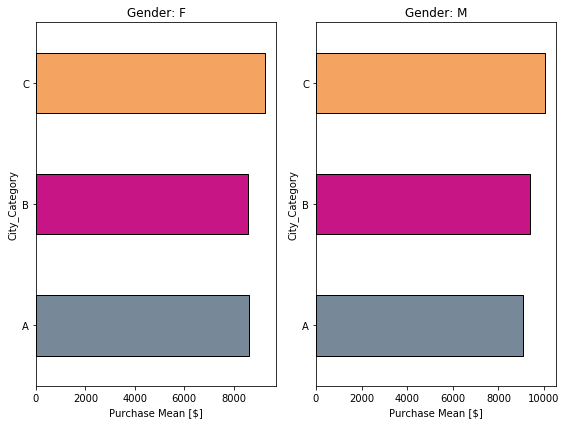

In [42]:
ig, ax = plt.subplots(nrows = 1 , ncols= 2, figsize = (8,6), sharey = False)

# Bar Colors
color = ('lightslategray','mediumvioletred','sandybrown')

gender_list = ['F','M']

for subplot, gender in zip(ax.flatten(),gender_list ):
    individual_bar_plots(pvt_purchase_mean_by_gender_city, gender, ax = subplot, title = 'Gender:')
    
plt.tight_layout()

## Occupation by City

In [43]:
# Rename columns to fit the plot 
df.rename(columns= {"City_Category" : "City_Cat", "Occupation": "Occup"}, inplace= True)
df.head(3)

,User_ID,Product_ID,Gender,Age,Occup,City_Cat,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [44]:
#List with Occupations
occ_list = sorted(df.Occup.unique())

occupation_purchase_city = df.pivot_table(df, index = ['Occup','City_Cat'])['Purchase']

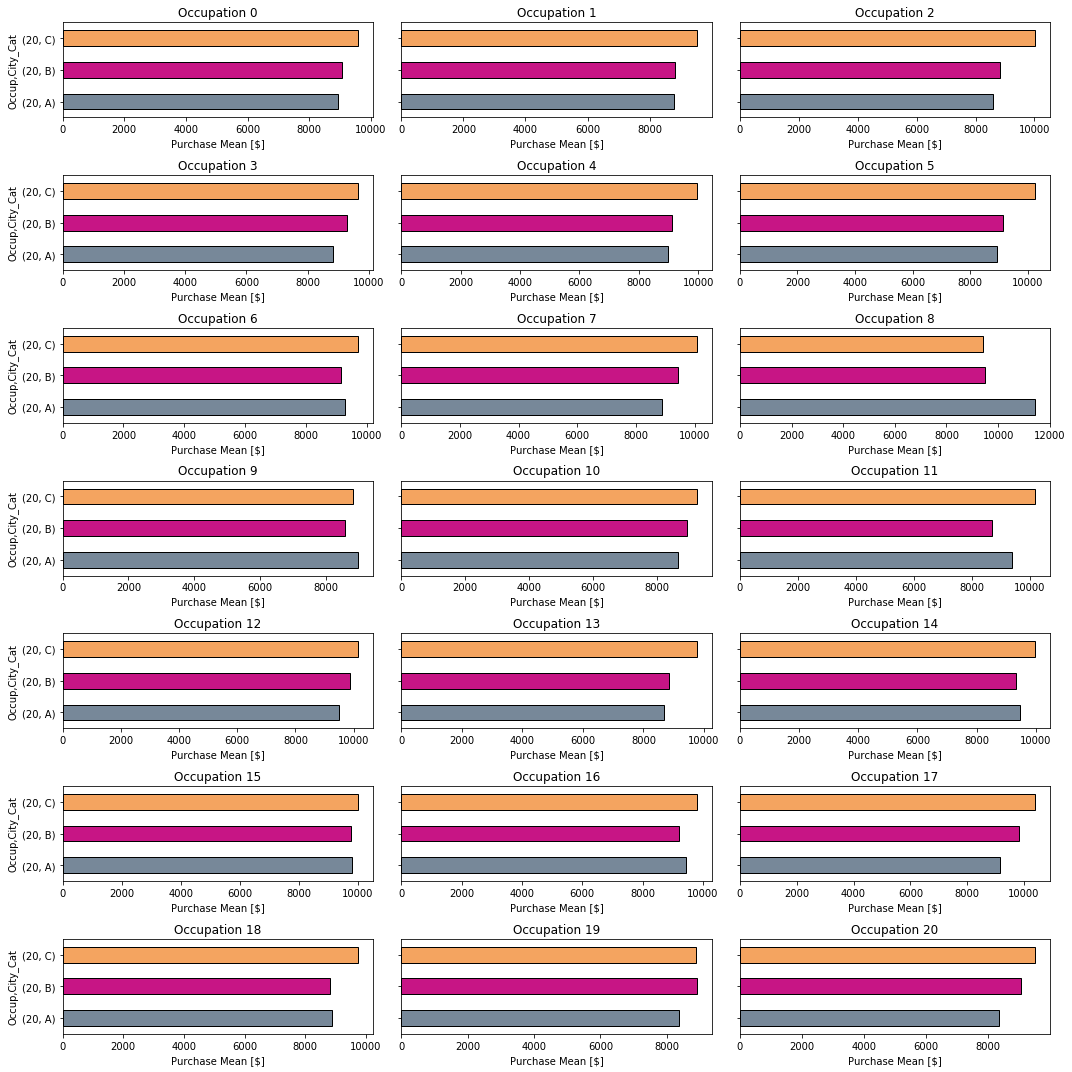

In [45]:
#Set color
color = ['lightslategray','mediumvioletred','sandybrown']
#Plot
fig, ax = plt.subplots(nrows=7 , ncols=3, figsize = (15,15), sharey = True)

for subplot, occupation in zip(ax.flatten(), occ_list):
    individual_bar_plots(occupation_purchase_city,occupation, ax = subplot , title = 'Occupation')
       
plt.tight_layout()

## Questão 1

Quantas observações e quantas colunas há no dataset? Responda no formato de uma tuple `(n_observacoes, n_colunas)`.

In [46]:
def q1():
    '''Calculates the total number of rows and columns of a given dataframe
    ARG: --
    
    RETURNS: 
    shape(tuple): A tuple with that contains the number of observation and number of columns respectively 
     '''
    # number of observations
    n_observacoes = df.shape[0]
    # Number of columns
    n_colunas = df.shape[1]
    
    shape = (n_observacoes,n_colunas)
    
    return shape
    

## Questão 2

"Há quantas mulheres com idade entre 26 e 35 anos no dataset? Responda como um único escalar."

# - How I would do.

def q2():
    '''Calculates the number of female aged between 26-35
    ARG: --
    
    RETURNS: 
    F_26_35(integer): The number of female aged between 26-35 
     '''
    
    # Filter unique users
    unique_users_df = df.groupby(["User_ID", "Age"], sort=False, as_index=False).first()
    
    # Filter female aged between 26-35
    aged_26_35 = unique_users_df.loc[ (unique_users_df['Age'] == '26-35') & (unique_users_df['Gender'] == 'F' ), : ]
    
    # Calculate the number of female aged between 26-35
    F_26_35 = aged_26_35.shape[0]
    
    return F_26_35 

In [1]:
def q2():
    '''Calculates the number of female aged between 26-35
    ARG: --
    
    RETURNS: 
    F_26_35(integer): The number of female aged between 26-35 
     '''
    
    
    # Filter female aged between 26-35
    female_aged_26_35 = df.loc[ (df['Age'] == '26-35') & (df['Gender'] == 'F' ), : ]
    
    # Calculate the number of female aged between 26-35
    F_26_35 = female_aged_26_35.shape[0]
    
    return F_26_35

## Questão 3

Quantos usuários únicos há no dataset? Responda como um único escalar.

In [17]:
def q3():
    
    '''Calculates the number unique users
    ARG: --
    
    RETURNS: 
    unique_users: The number of unique users 
    '''
    # Filter unique users
    unique_users_df = df.groupby(["User_ID"], sort=False, as_index=False).first()
    
    # Number of unique users
    unique_users = unique_users_df.shape[0]
    
    return unique_users


## Questão 4

Quantos tipos de dados diferentes existem no dataset? Responda como um único escalar.

In [34]:
def q4():
    ''' Calculates the number of different variable types in the dataset
    ARG: --
    
    RETURNS: 
    unique_types: The number of unique variable types 
    '''    
    # Unique variables
    unique_types = df.dtypes.unique().shape[0]
    
    return unique_types

## Questão 5

Qual porcentagem dos registros possui ao menos um valor null (`None`, `ǸaN` etc)? Responda como um único escalar entre 0 e 1.

In [36]:
def q5():
    '''Calculates the percentage of rows that contains at least 1 nan variable
    ARG: --
    
    RETURNS: 
    missing_percent(float): The percenta of variables with missing values
    ''' 
    # Total rows 
    total_rows = df.shape[0]
    # Number of rows with missing values
    missing_var_count = (df.isna().sum(axis = 1) != 0).sum() 
    
    # missing values percent
    missing_percent = missing_var_count / total_rows
    
    return float(missing_percent)

## Questão 6

Quantos valores null existem na variável (coluna) com o maior número de null? Responda como um único escalar.

In [10]:
def q6():
    ''' Returns the number of nan of the variable with the largest null number
    
    ARG: -- 
    
    RETURNS: 
    max_missing_count(integer): Number of missing values
    ''' 
    max_missing_count = df.isna().sum().max()
    
    return max_missing_count

## Questão 7

Qual o valor mais frequente (sem contar nulls) em `Product_Category_3`? Responda como um único escalar.

In [11]:
def q7():    
    ''' Calculates the most frequent value of Product_Category_3
    
    ARG: -- 
    
    RETURNS: 
    most_freq_cat3(float): Most frequent value of Product_category_3
    '''
    most_freq_cat3 =  df.Product_Category_3.value_counts().sort_values(ascending = False).keys()[0]
    
    return most_freq_cat3
   

## Questão 8

Qual a nova média da variável (coluna) `Purchase` após sua normalização? Responda como um único escalar.

In [12]:
def q8():
    '''Normalizes Purchase column and returns the purchase mean
    
    ARG: -- 
    
    RETURNS: 
    purchase_mean(float): The mean value of the purchase column after normalizing it.
    '''
    
    # Min purchase
    min_purchase = df['Purchase'].min()
    #Max purchase
    max_purchase = df['Purchase'].max()
    
    #Normalize Purchase
    df['Normalized_purchase'] = (df['Purchase'] - min_purchase) / (max_purchase - min_purchase)
    
    # Purchase mean
    purchase_mean = df['Normalized_purchase'].mean()
    
    return purchase_mean

## Questão 9

Quantas ocorrências entre -1 e 1 inclusive existem da variáel `Purchase` após sua padronização? Responda como um único escalar.

In [13]:
def q9():
    ''' Standardizes purchase column and return number of observations within the interval [-1,1]   
    ARG: -- 
    
    RETURNS: 
    within_minus1_and1(integer): Number of values within the interval [-1,1].
    '''

    #Calculate purchase mean and standard deviation
    purchase_mean = df['Purchase'].mean()
    purchase_std =  df['Purchase'].std()
    
    # dataframe with standardized purchase
    df['Standardized_purchase'] = (df['Purchase'] - purchase_mean) / (purchase_std)
    
    # Filter observations within [-1,1]
    within_minus1_and1  = df.loc[ (df['Standardized_purchase'] >= -1) & (df['Standardized_purchase'] <= 1), : ].shape[0]
    
    return within_minus1_and1

## Questão 10

Podemos afirmar que se uma observação é null em `Product_Category_2` ela também o é em `Product_Category_3`? Responda com um bool (`True`, `False`).

In [38]:
def q10():
    ''' Informs whether a nan element in product_category 2 corresponds to a nan element in product category 3 
    ARG: -- 
    
    RETURNS: 
    is_equal(Bool): Bool variable informing whether a nan element in product_category 2 corresponds 
    to a nan element in product category 3
    '''

    # Bool variables inform whether products 2 and 3 have a nan variable
    products_bool_df = df[['Product_Category_2','Product_Category_3']].isna()

    # Filter rows where product_category_2 is nan (True)
    product2_isna = products_bool_df.loc[products_bool_df['Product_Category_2'] == True, :]

    # Compare the series of each product and informs whether they are equal or not 
    is_equal = product2_isna['Product_Category_2'].equals(product2_isna['Product_Category_3'])
    
    return is_equal
    
